In [97]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
def f(x):
    return 3*x**2 - 4*x + 5

In [99]:
f(3)

20

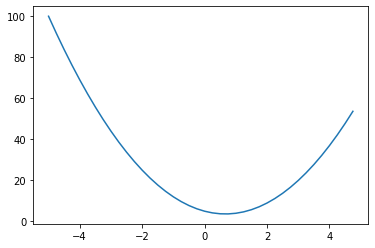

In [100]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [101]:
h = 0.00000001
x = 2/3
(f(x + h) - f(x))/h

0.0

In [102]:
# let's get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [103]:
h = 0.00001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


In [104]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # rank_direction = LR is left to right

    nodes, edges = trace(root)
    for node in nodes:
        uid = str(id(node))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (node.label, node.data, node.grad), shape='record')
        if node._op:
            dot.node(name = uid + node._op, label = node._op)
            dot.edge(uid + node._op, uid)
        
    for src, dst in edges:
        dot.edge(str(id(src)), str(id(dst)) + (dst._op or ''))
    
    return dot

In [105]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

In [106]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b;  e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'

L

Value(data=-8.0)

In [107]:
d, d._prev, d._op

(Value(data=4.0), {Value(data=-6.0), Value(data=10.0)}, '+')

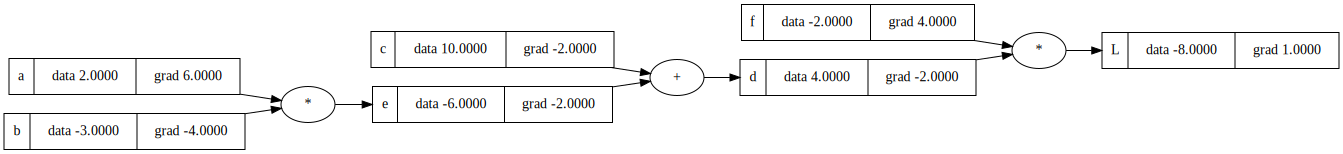

In [116]:
draw_dot(L)

In [115]:
L.grad = 1
d.grad = f.data
f.grad = d.data
c.grad = d.grad
e.grad = d.grad
a.grad = e.grad * b.data
b.grad = e.grad * a.data

In [123]:
lr = 0.01
leaf_nodes = [a, b, c, f]
for node in leaf_nodes:
    node.data += lr * node.grad

In [124]:
# forward pass
e = a*b
d = e + c
L = d*f

print(L.data)

-6.586368000000001


In [120]:
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b;  e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b;  e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)

lol()

-4.000000000008441
